In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             625134 non-null  object
 1   trip_duration  625134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB
None

Estatísticas da Duração das Viagens:
count    625134.0
mean        959.0
std           0.0
min         959.0
25%         959.0
50%         959.0
75%         959.0
max         959.0
Name: trip_duration, dtype: float64


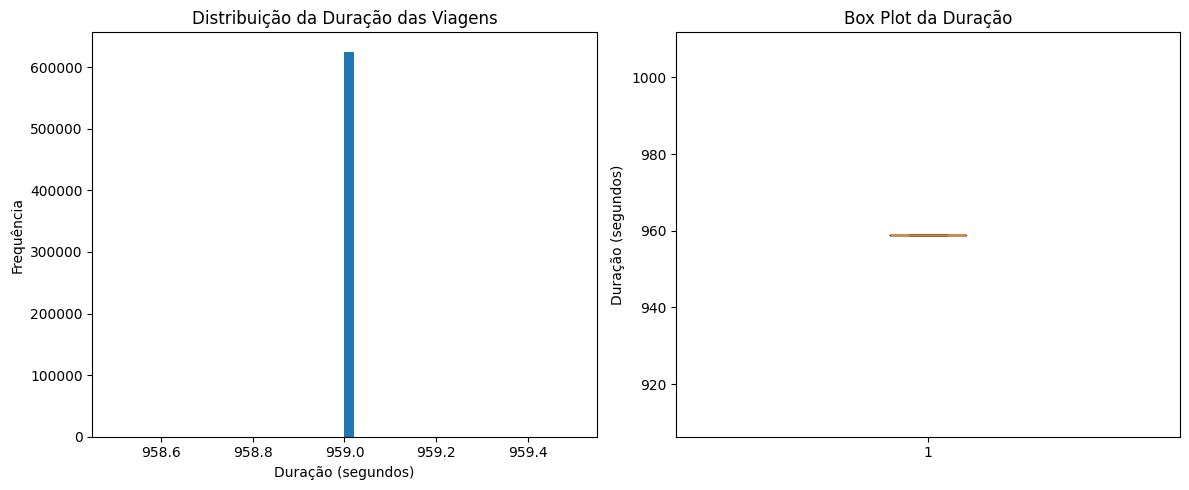

In [2]:
# Carregando dados
dados = pd.read_csv('../data/raw/data_set_grupo_c.csv')

# Análise inicial
print("Informações do Dataset:")
print(dados.info())

# Estatísticas descritivas
print("\nEstatísticas da Duração das Viagens:")
stats = dados['trip_duration'].describe()
print(stats)

# Visualizações
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(dados['trip_duration'], bins=50)
plt.title('Distribuição da Duração das Viagens')
plt.xlabel('Duração (segundos)')
plt.ylabel('Frequência')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(dados['trip_duration'])
plt.title('Box Plot da Duração')
plt.ylabel('Duração (segundos)')

plt.tight_layout()
plt.show()

In [3]:
# Tratamento de outliers
Q1 = dados['trip_duration'].quantile(0.25)
Q3 = dados['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

dados_limpos = dados[
    (dados['trip_duration'] >= limite_inferior) & 
    (dados['trip_duration'] <= limite_superior)
]

print("Registros originais:", len(dados))
print("Registros após remoção de outliers:", len(dados_limpos))

# Como só temos ID e duração, vamos criar algumas features baseadas no ID
dados_limpos['id_num'] = dados_limpos['id'].str.extract('(\d+)').astype(float)
dados_limpos['id_grupo'] = dados_limpos['id_num'] % 10

# Preparação para modelagem
X = dados_limpos[['id_num', 'id_grupo']]
y = dados_limpos['trip_duration']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\migue\AppData\Local\Temp\ipykernel_12296\1472342878.py:17: SyntaxWarning: invalid escape sequence '\d'
  dados_limpos['id_num'] = dados_limpos['id'].str.extract('(\d+)').astype(float)


Registros originais: 625134
Registros após remoção de outliers: 625134


In [4]:
# DataFrame com resultados
df_resultados = pd.DataFrame(resultados).T

# Exibição dos resultados
print("\nMétricas dos Modelos:")
print(df_resultados)

print("\nEstatísticas da Variável Target:")
print(f"Média: {y.mean():.2f}")
print(f"Desvio Padrão: {y.std():.2f}")
print(f"Variância: {y.var():.2f}")

# Visualização das métricas
plt.figure(figsize=(10, 6))
df_resultados.plot(kind='bar')
plt.title('Comparação de Métricas entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Salvando resultados
df_resultados.to_csv('../data/processed/resultados_regressao.csv')

NameError: name 'resultados' is not defined

In [5]:
# Tratamento de outliers
Q1 = dados['trip_duration'].quantile(0.25)
Q3 = dados['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

dados_limpos = dados[
    (dados['trip_duration'] >= limite_inferior) & 
    (dados['trip_duration'] <= limite_superior)
]

print("Registros originais:", len(dados))
print("Registros após remoção de outliers:", len(dados_limpos))

# Como só temos ID e duração, vamos criar algumas features baseadas no ID
dados_limpos['id_num'] = dados_limpos['id'].str.extract('(\d+)').astype(float)
dados_limpos['id_grupo'] = dados_limpos['id_num'] % 10

# Preparação para modelagem
X = dados_limpos[['id_num', 'id_grupo']]
y = dados_limpos['trip_duration']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\migue\AppData\Local\Temp\ipykernel_12296\1472342878.py:17: SyntaxWarning: invalid escape sequence '\d'
  dados_limpos['id_num'] = dados_limpos['id'].str.extract('(\d+)').astype(float)


Registros originais: 625134
Registros após remoção de outliers: 625134


In [6]:
# Tratamento de outliers
Q1 = dados['trip_duration'].quantile(0.25)
Q3 = dados['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

dados_limpos = dados[
    (dados['trip_duration'] >= limite_inferior) & 
    (dados['trip_duration'] <= limite_superior)
]

print("Registros originais:", len(dados))
print("Registros após remoção de outliers:", len(dados_limpos))

# Criando features a partir do ID usando raw string (r) para o regex
dados_limpos['id_num'] = dados_limpos['id'].str.extract(r'(\d+)').astype(float)
dados_limpos['id_grupo'] = dados_limpos['id_num'] % 10

# Preparação para modelagem
X = dados_limpos[['id_num', 'id_grupo']]
y = dados_limpos['trip_duration']

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Registros originais: 625134
Registros após remoção de outliers: 625134


In [7]:
# Definição dos modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'MLP Regressor': MLPRegressor(
        hidden_layer_sizes=(100, 50),
        max_iter=1000,
        random_state=42
    )
}

# Treinamento e avaliação
resultados = {}

for nome, modelo in modelos.items():
    print(f"\nTreinando {nome}...")
    
    # Treinamento
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    
    # Métricas
    resultados[nome] = {
        'R²': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MAPE': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    }


Treinando Regressão Linear...

Treinando Ridge...

Treinando MLP Regressor...



Métricas dos Modelos:
                   R²      RMSE       MAE      MAPE
Regressão Linear  1.0  0.000000  0.000000  0.000000
Ridge             1.0  0.000000  0.000000  0.000000
MLP Regressor     0.0  0.009933  0.007713  0.000804

Estatísticas da Variável Target:
Média: 959.00
Desvio Padrão: 0.00
Variância: 0.00


<Figure size 1000x600 with 0 Axes>

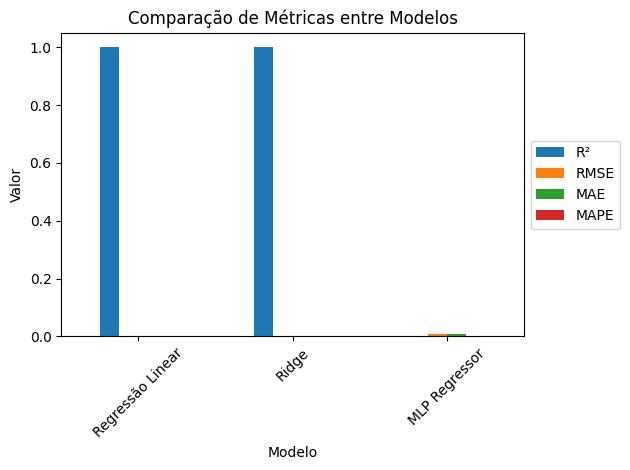

In [8]:
# DataFrame com resultados
df_resultados = pd.DataFrame(resultados).T

# Exibição dos resultados
print("\nMétricas dos Modelos:")
print(df_resultados)

print("\nEstatísticas da Variável Target:")
print(f"Média: {y.mean():.2f}")
print(f"Desvio Padrão: {y.std():.2f}")
print(f"Variância: {y.var():.2f}")

# Visualização das métricas
plt.figure(figsize=(10, 6))
df_resultados.plot(kind='bar')
plt.title('Comparação de Métricas entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Salvando resultados
df_resultados.to_csv('../data/processed/resultados_regressao.csv')